Root Mean Squared Error: 5.018650701029454


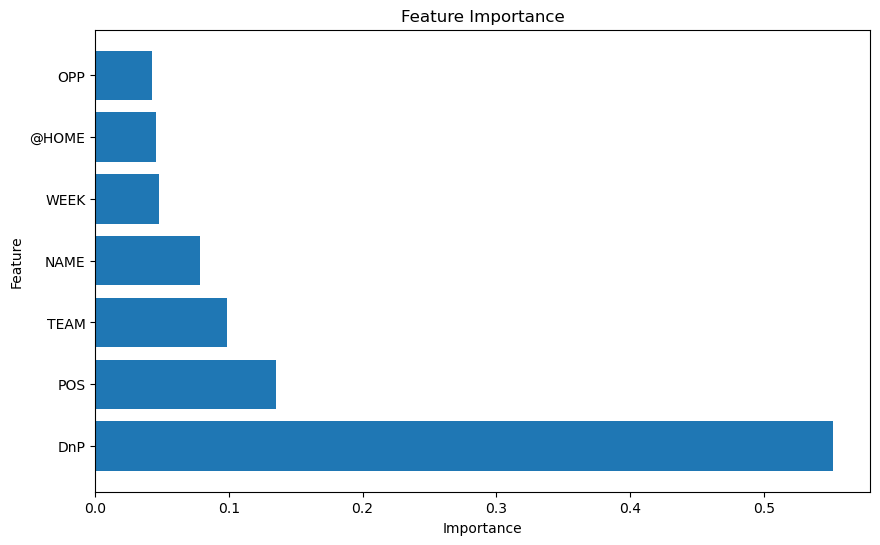

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import joblib
# Load your DataFrame
data = pd.read_csv('WK_1-8.csv')  # Replace 'your_data.csv' with the actual file path
data = data.dropna(subset=['WON'])


columns_to_check = [
    "PASS_COMP", "PASS_YDS", "PASS_TD", "INT",
    "CAR", "RUSH_YDS", "RUSH_TD", "REC",
    "REC_YARDS", "REC_TD", "TARGETS", "2PC",
    "FUML", "MISC_TD"
]
data["DnP"] = (data[columns_to_check] == 0).all(axis=1)


# Define the features and target variable
features = ['NAME', 'POS', 'TEAM', 'OPP', '@HOME', 'WEEK', 'DnP']
target = 'FPTS'


label_encoders = {}
categorical_columns = ['POS', 'TEAM', 'OPP', 'NAME', '@HOME', 'DnP']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])



# Sort your data by week
data.sort_values(by='WEEK', inplace=True)
# Split the data by week
train_data = data[data['WEEK'] <= 7]  # Use the first four weeks for training
test_data = data[data['WEEK'] == 8]   # Use the fifth week for testing
# Define the features and target variable
# Separate features and target variables for training and testing
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]
# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model using RMSE (Root Mean Squared Error)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")





# Get feature importances from the model
feature_importance = model.feature_importances_
feature_names = model.get_booster().feature_names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()







In [4]:
model.save_model('xgboost_model.model')
# model.save_model('xgboost_model1-8.pkl')
# joblib.dump(label_encoders, 'label_encoders1-8.pkl')


c:\Users\Daymo\anaconda3\envs\tf2.10\lib\site-packages\xgboost\core.py:160: UserWarning: [02:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [2]:
data.head()

,NAME,POS,TEAM,OPP,@HOME,WON,TEAM_PTS,PROJ_PTS,PASS_COMP,PASS_YDS,...,REC,REC_YARDS,REC_TD,TARGETS,2PC,FUML,MISC_TD,FPTS,WEEK,DnP
0,567,0,19,16,0,True,36,17.6,28,466,...,0,0,0,0,0,1,0,27.14,1,0
403,165,3,17,28,0,True,30,3.6,0,0,...,0,0,0,0,0,0,0,0.00,1,1
404,225,3,26,27,1,False,7,0.0,0,0,...,0,0,0,0,0,0,0,0.00,1,1
405,337,3,3,24,0,False,16,0.0,0,0,...,0,0,0,0,0,0,0,0.00,1,1
406,553,3,18,9,0,True,17,0.0,0,0,...,0,0,0,0,0,0,0,0.00,1,1


In [2]:
df = pd.read_csv('WK_1-6.csv')
unique_teams = df['TEAM'].unique()
print(unique_teams)

position_group = 'QB'  # Replace with the desired position group
# Filter the DataFrame to include only the desired position group
filtered_df = df[df['POS'] == position_group]
# Get the unique players from the filtered DataFrame
unique_players = filtered_df['NAME'].unique()
# Print the unique players in the specified position group
df.head()

['Mia' 'NE' 'GB' 'Ind' 'LAC' 'Cle' 'KC' 'Jax' 'SF' 'Min' 'TB' 'Den' 'Wsh'
 'LV' 'NO' 'Chi' 'LAR' 'Det' 'Phi' 'Hou' 'Pit' 'Sea' 'Buf' 'Atl' 'NYJ'
 'Car' 'Bal' 'Dal' 'NYG' 'Cin' 'Ten' 'Ari']


,NAME,POS,TEAM,OPP,@HOME,WON,TEAM_PTS,PROJ_PTS,PASS_COMP,PASS_YDS,...,RUSH_TD,REC,REC_YARDS,REC_TD,TARGETS,2PC,FUML,MISC_TD,FPTS,WEEK
0,Tua Tagovailoa,QB,Mia,LAC,False,True,36,17.6,28,466,...,0,0,0,0,0,0,1,0,27.14,1
1,Mac Jones,QB,NE,Phi,True,False,20,14.7,35,316,...,0,0,0,0,0,0,0,0,24.14,1
2,Jordan Love,QB,GB,Chi,False,True,38,14.8,15,245,...,0,0,0,0,0,0,0,0,23.00,1
3,Anthony Richardson,QB,Ind,Jax,True,False,21,17.2,24,223,...,1,0,0,0,0,0,0,0,20.92,1
4,Justin Herbert,QB,LAC,Mia,True,False,34,16.9,23,229,...,1,0,0,0,0,0,0,0,20.86,1


In [38]:



# Create a new data point for prediction with the same features
player = 'Aaron Rodgers'
position = 'QB'
team = 'NYJ'
Opp = 'LAC'
at_home = True
week = 9
DnP = False
new_data_point = {
    'NAME': label_encoders['NAME'].transform([player])[0],
    'POS': label_encoders['POS'].transform([position])[0],
    'TEAM': label_encoders['TEAM'].transform([team])[0],
    'OPP': label_encoders['OPP'].transform([Opp])[0], 
    '@HOME': label_encoders['@HOME'].transform([at_home])[0], 
    'WEEK': week,
    'DnP': label_encoders['DnP'].transform([DnP])[0]
}
# Create a DataFrame with the new data point
new_data_df = pd.DataFrame([new_data_point])
# Use the model to make predictions
predicted_fpts = model.predict(new_data_df)
# Display the predicted fantasy points
print(f"Predicted points: {player} {predicted_fpts[0]:.2f}")


Predicted points: Aaron Rodgers 19.45
